In [1]:
#구글드라이브 csv 공유파일 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url="https://drive.google.com/file/d/1cugqUx6N_sO7YGRzXBln-VGLZxUs9LKc/view?usp=share_link"
path='https://drive.google.com/uc?id='+url.split('/')[-2]
print("▶ 공유파일 링크변환 경로명 : ", path)

▶ 공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1cugqUx6N_sO7YGRzXBln-VGLZxUs9LKc


In [2]:
data = pd.read_csv(path)
data.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK


In [3]:
data.describe()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
count,835200.000000,835200.000000,835200.000000,835200.000000,835200.000000
mean,417599.500000,509.200623,459.782865,582.962125,3.194853
std,241101.616752,128.277519,639.436413,1217.604433,0.011822
min,0.000000,308.000000,0.000000,0.000000,3.170000
25%,208799.750000,430.000000,119.000000,186.000000,3.190000
50%,417599.500000,469.000000,168.000000,383.000000,3.190000
75%,626399.250000,502.000000,218.000000,583.000000,3.200000
max,835199.000000,832.000000,1804.000000,55252.000000,3.230000


In [4]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport
# EDA Report 생성
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

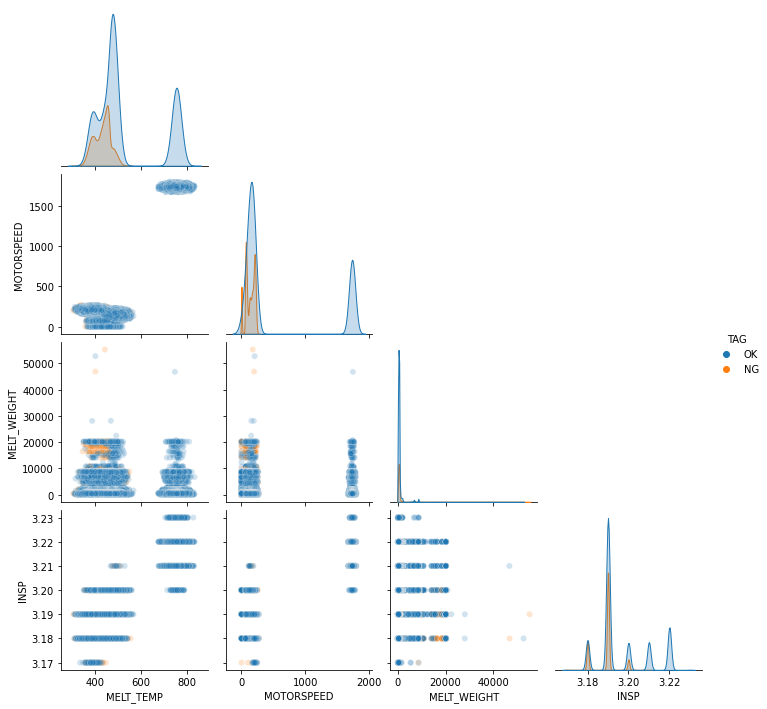

In [5]:
# TAG 분포 pairplot
sns.pairplot(data=data.drop(labels = 'NUM', axis = 1), hue='TAG', corner=True, plot_kws={'alpha':0.2})

<AxesSubplot:>

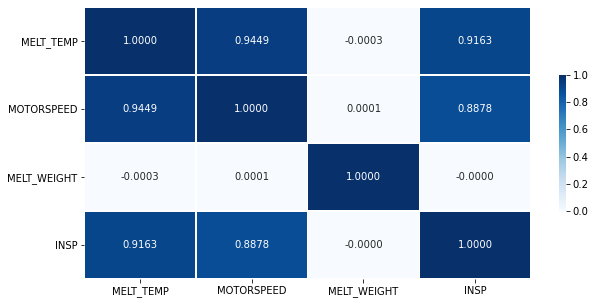

In [6]:
# Column 상관관계 Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data = data.drop(labels = 'NUM', axis = 1).corr(), annot=True, 
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            fmt = '.4f', cmap='Blues')

In [4]:
TAG_NG = data[data['TAG'] == 'NG']
TAG_OK = data[data['TAG'] == 'OK']

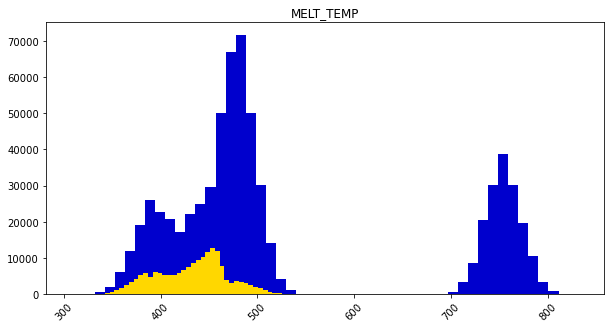

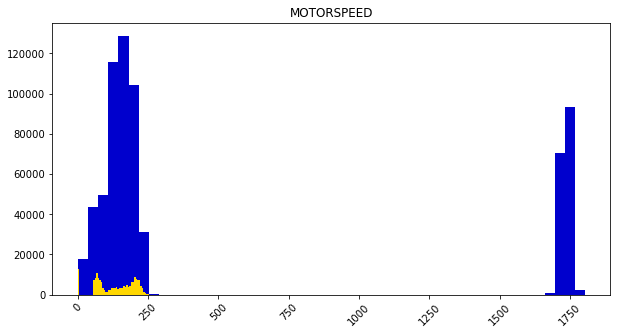

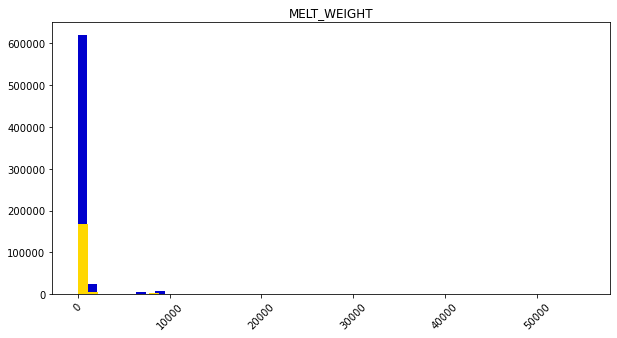

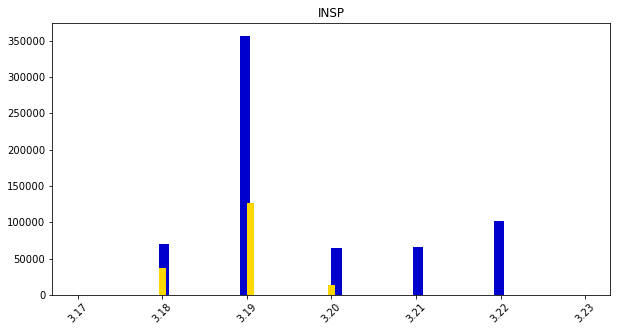

In [8]:
# TAG에 따른 column 분포
col_name = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']
for i in col_name:
    plt.figure(figsize = (10, 5))
    plt.hist(TAG_OK[i], bins = 50, color='mediumblue')
    plt.hist(TAG_NG[i], bins = 50, color='gold')
    plt.xticks(rotation = 45)
    plt.title(i)
    plt.show()

In [9]:
data.loc[data.TAG=='NG']
data.loc[data.TAG=='OK']

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [10]:
data = data[['STD_DT', 'NUM', 'MELT_TEMP','MOTORSPEED','MELT_WEIGHT','INSP','TAG']]

In [11]:
data = data.set_index('STD_DT')
data.index = pd.to_datetime(data.index)

In [12]:
# tag 숫자로 변환해서 사용

data['TAG_num'] = [0 if i =='OK' else 1 for i in data.TAG]

In [13]:
data

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,TAG_num
STD_DT,,,,,,,
2020-03-04 00:00:00,0,489,116,631,3.19,OK,0
2020-03-04 00:00:00,1,433,78,609,3.19,OK,0
2020-03-04 00:00:00,2,464,154,608,3.19,OK,0
2020-03-04 00:00:00,3,379,212,606,3.19,OK,0
2020-03-04 00:00:00,4,798,1736,604,3.21,OK,0
...,...,...,...,...,...,...,...
2020-04-30 23:59:00,835195,755,1743,318,3.21,OK,0
2020-04-30 23:59:00,835196,385,206,317,3.19,OK,0
2020-04-30 23:59:00,835197,465,148,316,3.20,OK,0


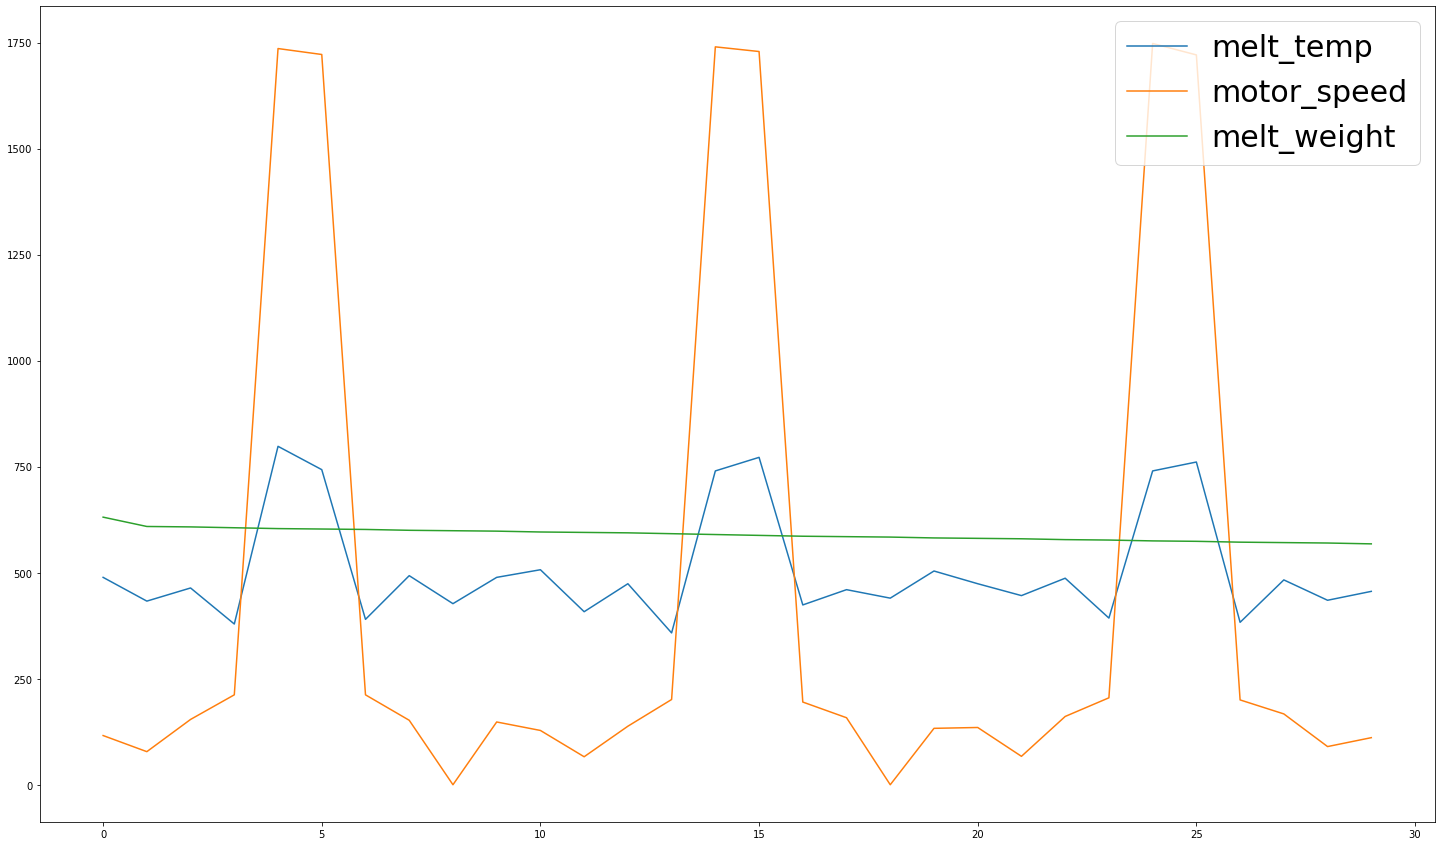

In [14]:
# 각 feature에 대한 값 확인

plt.figure(figsize=(25,15))
plt.plot(data.NUM[:30], data.MELT_TEMP[:30],label='melt_temp')
plt.plot(data.NUM[:30], data.MOTORSPEED[:30],label='motor_speed')
plt.plot(data.NUM[:30], data.MELT_WEIGHT[:30],label='melt_weight')
plt.legend(prop={'size': 30})

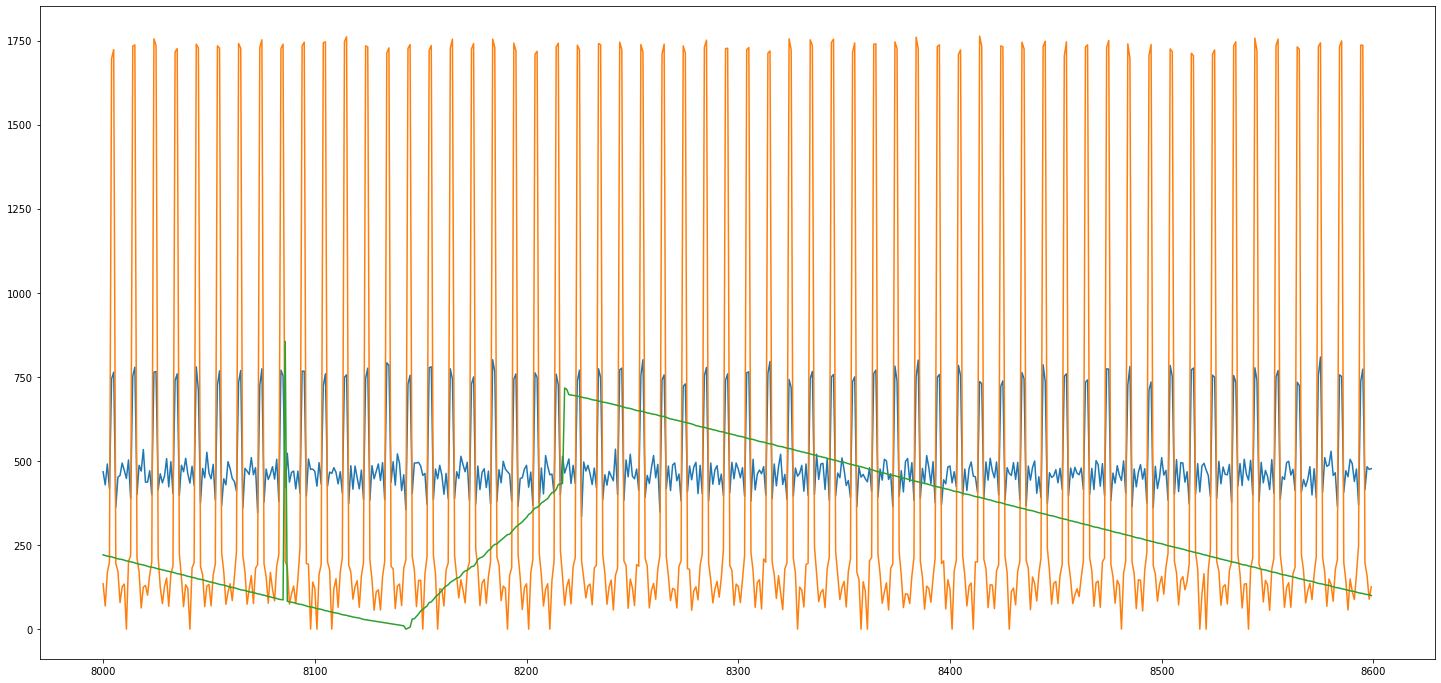

In [15]:
# 1시간 단위(Lot 개념 도입)로 데이터 확인
i=8000
plt.figure(figsize=(25,12))
plt.plot(data.iloc[i:600+i,0], data.iloc[i:600+i,1])
plt.plot(data.iloc[i:600+i,0], data.iloc[i:600+i,2])
plt.plot(data.iloc[i:600+i,0], data.iloc[i:600+i,3])

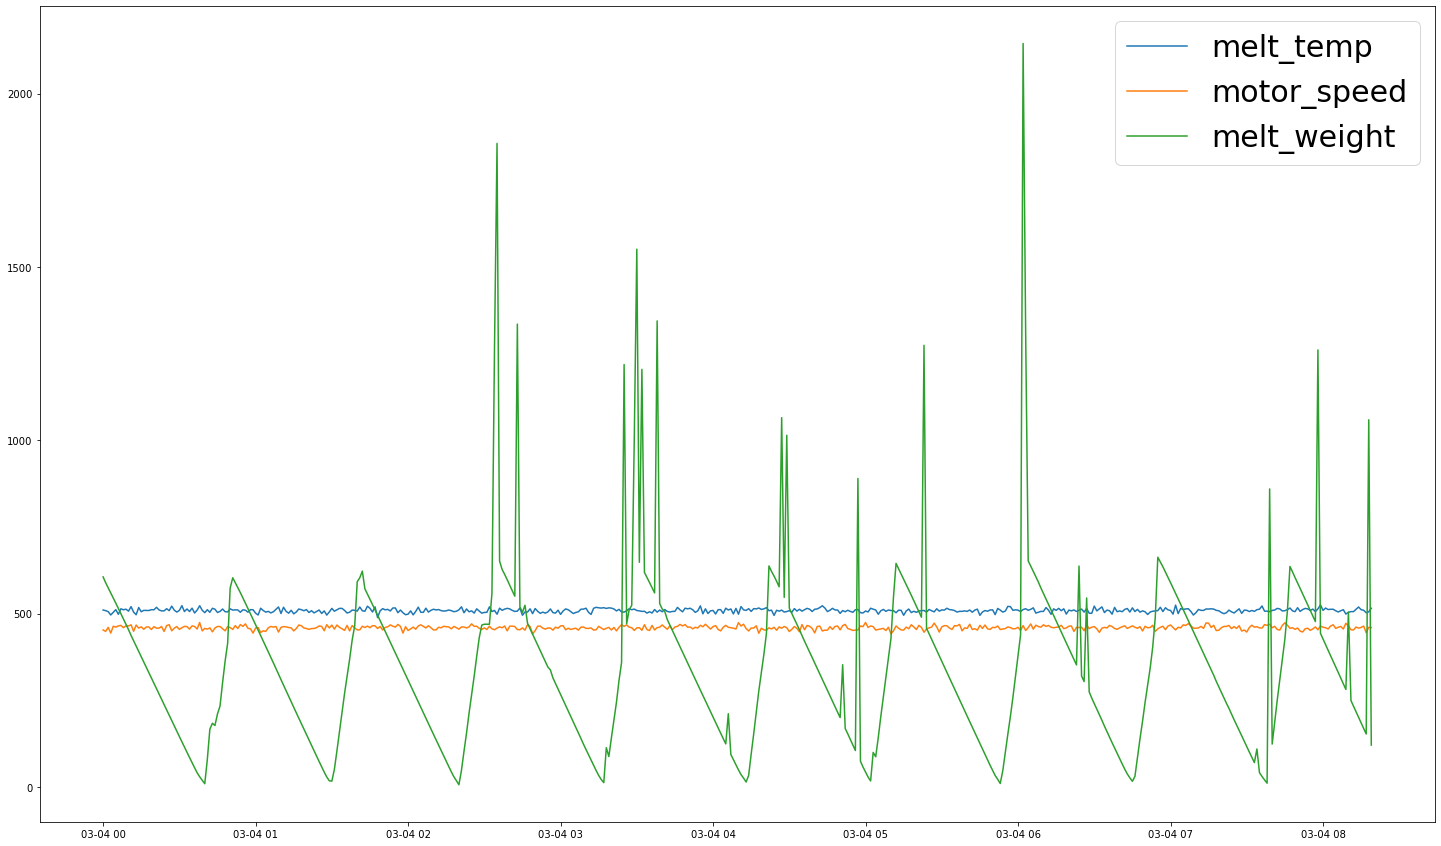

In [16]:
# 1분단위로 평균내서 데이터 확인

data_min = data.resample(rule='1min').mean()
plt.figure(figsize=(25,15))
plt.plot(data_min.index[:500], data_min.MELT_TEMP[:500],label='melt_temp')
plt.plot(data_min.index[:500], data_min.MOTORSPEED[:500],label='motor_speed')
plt.plot(data_min.index[:500], data_min.MELT_WEIGHT[:500],label='melt_weight')
plt.legend(prop={'size': 30})

In [17]:
# 1시간 단위로 평균내서 데이터 확인 
data2 = data.resample(rule='1H').mean()
data2.head()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG_num
STD_DT,,,,,,
2020-03-04 00:00:00,299.5,509.631667,459.305000,331.983333,3.194950,0.0
2020-03-04 01:00:00,899.5,508.148333,459.366667,316.873333,3.194850,0.0
2020-03-04 02:00:00,1499.5,507.846667,459.173333,377.843333,3.195017,0.0
2020-03-04 03:00:00,2099.5,509.446667,459.706667,385.510000,3.194633,0.0
2020-03-04 04:00:00,2699.5,509.758333,458.400000,312.081667,3.194767,0.0


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

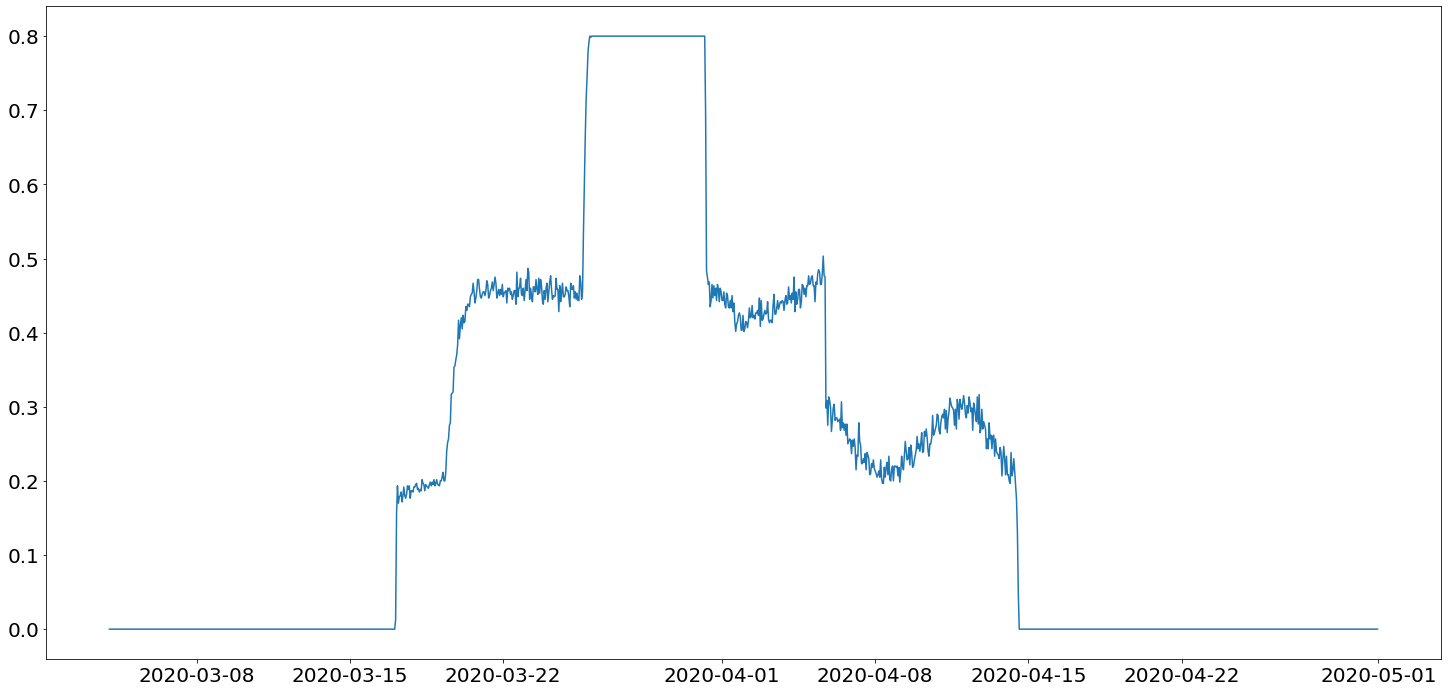

In [19]:
# 전체 구간에 대해 NG비율 확인
plt.figure(figsize=(25,12))
plt.plot(data2.index, data2.TAG_num)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [15]:
# 구간별로 데이터 확인 : 향후 모델에 사용할 데이터 나눔

# i=313-314, 20/03/17 02시  188400
# i=369-370, 20/03/19 10시  222000
# i=519-520, 20/03/25 16시  312000
# i=653-654, 20/03/31 06시  392400
# i=785-786, 20/04/05 18시  471600
# i=867-868, 20/04/09 04시
# i=954-955, 20/04/12 19시
# i=996-997, 20/04/14 13시  598200
data.loc[pd.to_datetime('2020-04-14 13:00:00'):pd.to_datetime('2020-04-14 17:00:00'),:]#.resample(rule='1H').mean()

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG,TAG_num
STD_DT,,,,,,,
2020-04-14 13:00:00,598200,517,110,83,3.19,OK,0
2020-04-14 13:00:00,598201,425,0,82,3.19,OK,0
2020-04-14 13:00:00,598202,474,178,80,3.20,OK,0
2020-04-14 13:00:00,598203,362,234,79,3.18,OK,0
2020-04-14 13:00:00,598204,726,1744,77,3.22,OK,0
...,...,...,...,...,...,...,...
2020-04-14 17:00:00,600605,759,1755,125,3.22,OK,0
2020-04-14 17:00:00,600606,390,208,127,3.19,OK,0
2020-04-14 17:00:00,600607,449,175,132,3.19,OK,0


In [3]:
# 전처리 데이터 로드

data_pre = pd.read_csv('로트,중량전처리조.csv')[['STD_DT','NUM','MELT_TEMP','MOTORSPEED','MELT_WEIGHT_PRE','INSP','TAG']]
data_pre.columns = ['STD_DT','NUM','MELT_TEMP','MOTORSPEED','MELT_WEIGHT','INSP','TAG']
data_pre.head()

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631.0,3.19,OK
1,2020-03-04 0:00,1,433,78,609.0,3.19,OK
2,2020-03-04 0:00,2,464,154,608.0,3.19,OK
3,2020-03-04 0:00,3,379,212,606.0,3.19,OK
4,2020-03-04 0:00,4,798,1736,604.0,3.21,OK


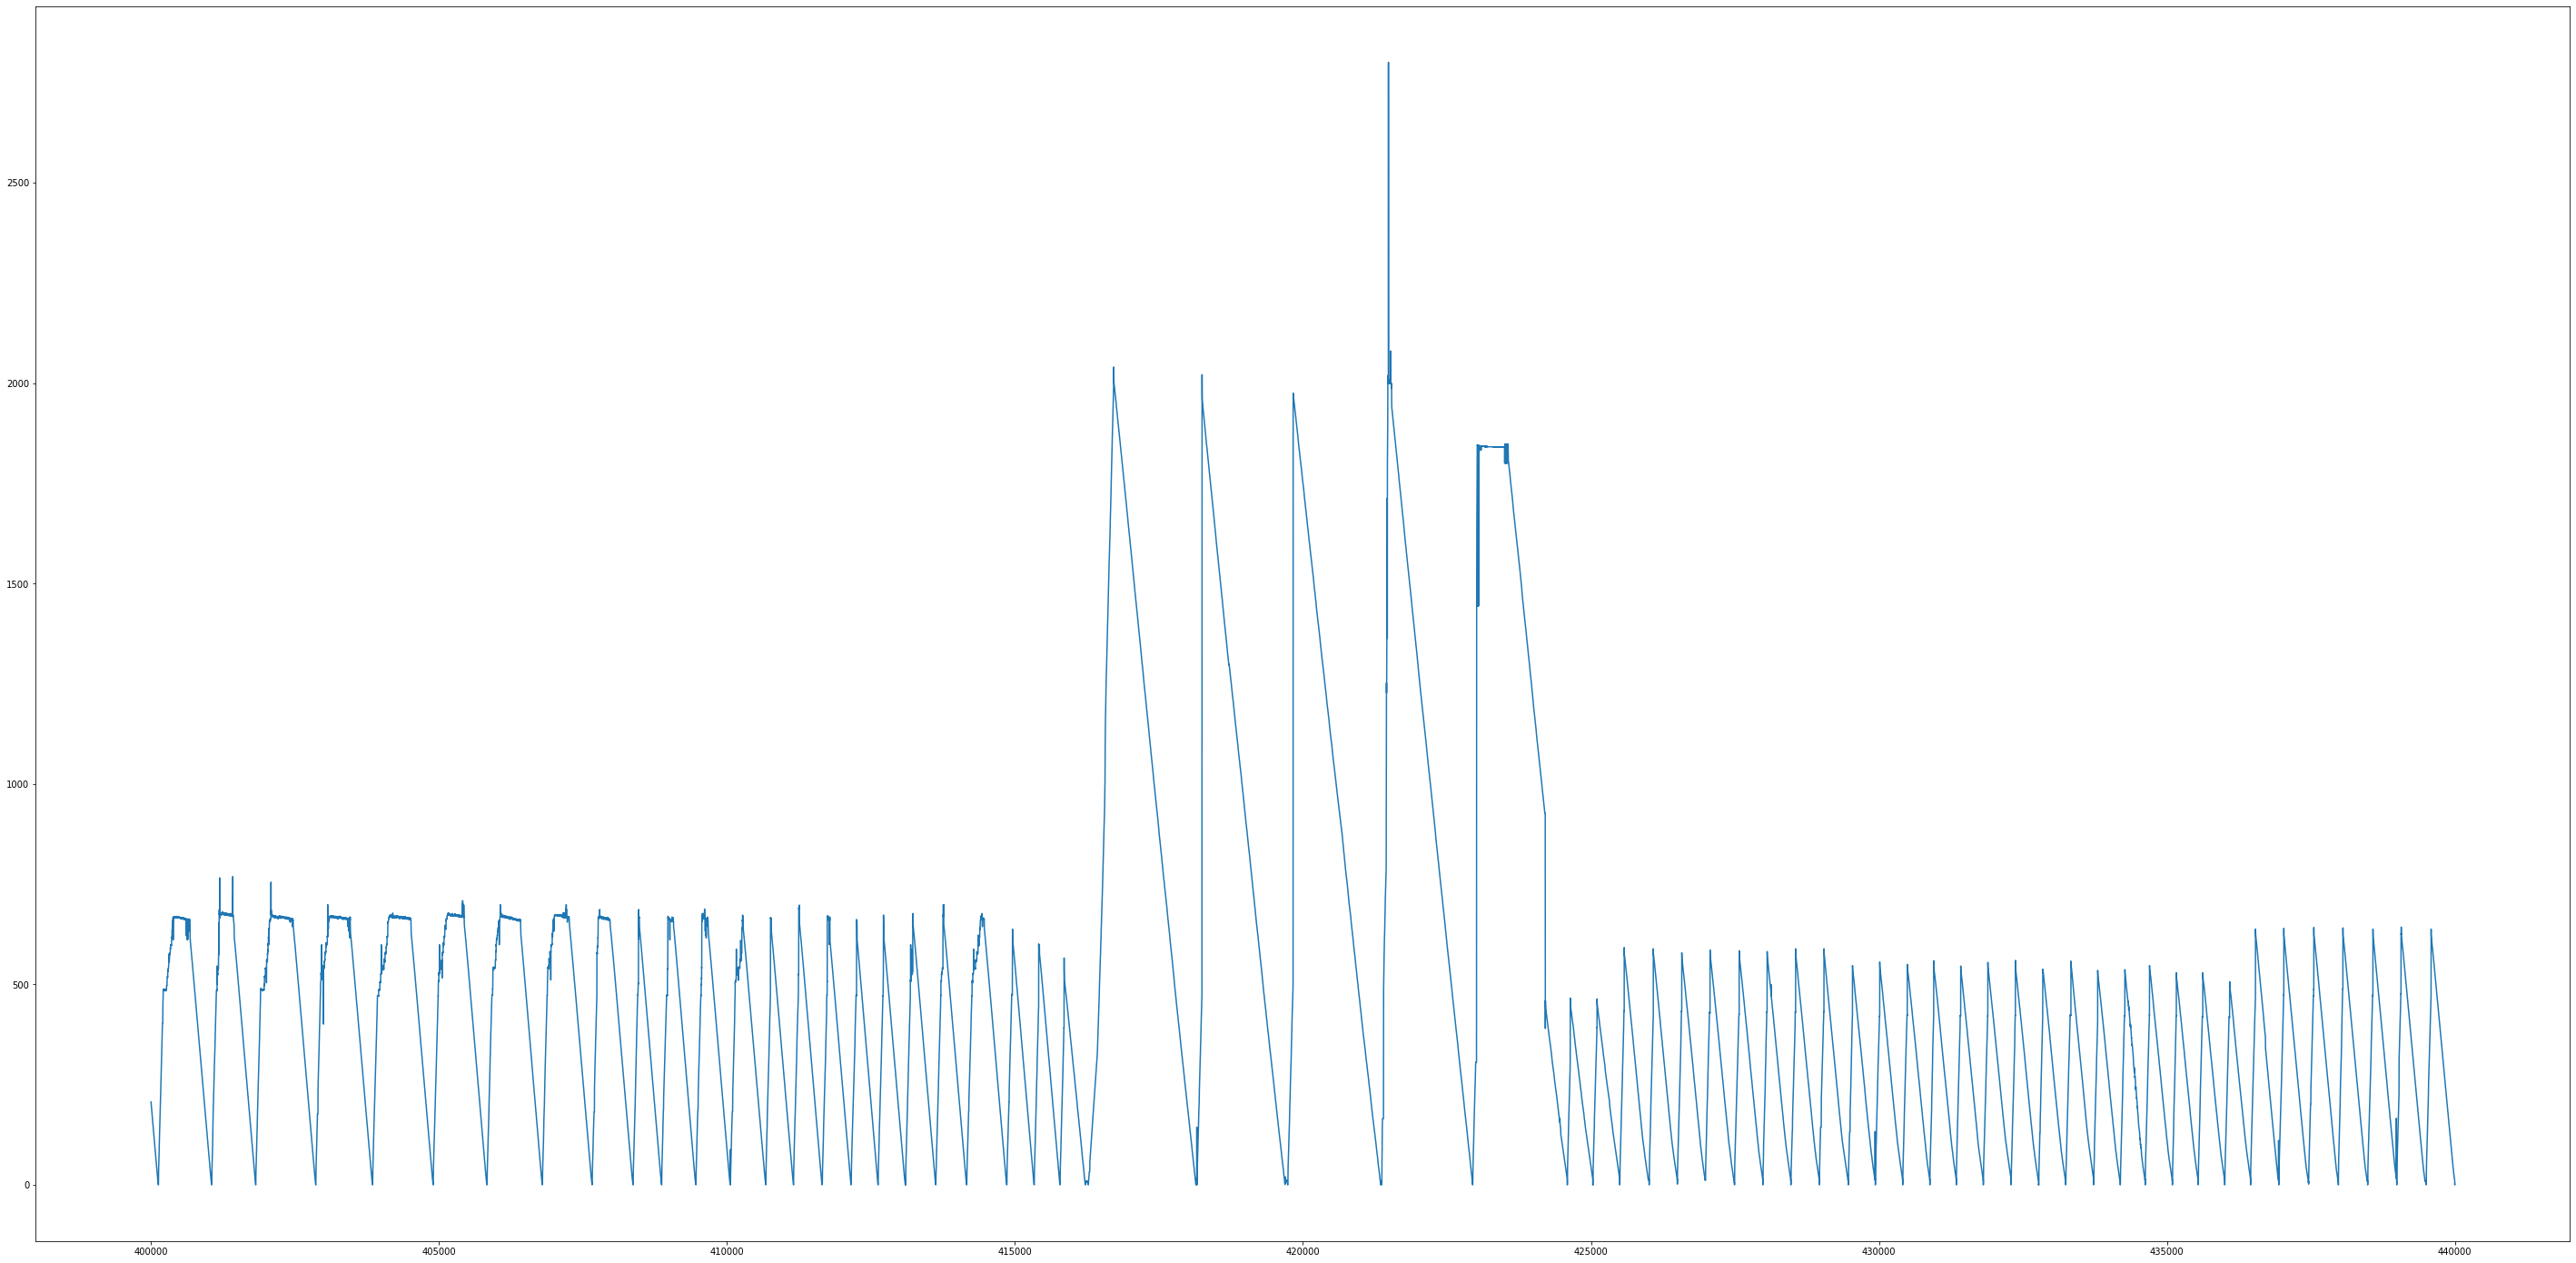

In [4]:
# 전처리 후 Melt_weight 변화 확인

a=10
b=a+1
i, j = 40000*a, 40000*b
plt.figure(figsize=(50,25))
plt.plot(data_pre.index[i:j], data_pre.MELT_WEIGHT[i:j])